In [1]:
import tensorflow as tf
import tensorflow.keras as keras

In [2]:
tf.__version__

'2.1.0'

In [3]:
keras.__version__

'2.2.4-tf'

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


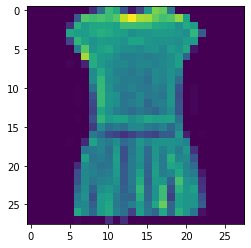

In [18]:
import matplotlib.pyplot as plt
plt.imshow(X_train[3])

In [11]:
y_train[1]

0

In [12]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress','Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [16]:
class_names[y_train[3]]

'Dress'

In [19]:
X_train[10]

array([[  0,   0,   0,   0,   0,   0,   0,  11, 142, 200, 106,   0,   0,
          0,   0,   0,   0,   0,  85, 185, 112,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 152, 214, 217, 194, 236, 216, 187,
        149, 135, 153, 211, 217, 231, 205, 217, 188,  34,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  66, 185, 166, 180, 181, 190, 211, 221,
        197, 146, 198, 206, 191, 168, 190, 172, 188, 175,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 135, 153, 160, 175, 180, 170, 186, 187,
        190, 188, 190, 187, 174, 195, 185, 174, 161, 175,  59,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 161, 147, 160, 170, 178, 177, 180, 168,
        173, 174, 171, 185, 184, 185, 172, 171, 164, 174, 120,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2, 175, 146, 145, 168, 178, 181, 185, 180,
        184, 178, 179, 187, 191, 193, 190, 181, 171, 172, 158,   0,   0,
          0,   0],
       [  

In [20]:
X_train_n = X_train / 255.0
X_test_n = X_test / 255.0

In [21]:
X_train_n.shape

(60000, 28, 28)

In [22]:
X_valid, X_train = X_train_n[:5000], X_train_n[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]
X_test = X_test_n

In [25]:
X_valid.shape

(5000, 28, 28)

In [26]:
import numpy as np
np.random.seed(42)
tf.random.set_seed(42)

In [28]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [39]:
weights, biases = model.layers[1].get_weights()

In [40]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [41]:
weights.shape

(784, 300)

In [42]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [43]:
model.compile(loss='sparse_categorical_crossentropy', 
             optimizer="sgd",
             metrics=["accuracy"])

In [44]:
model_history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 11s 192us/sample - loss: 0.7226 - accuracy: 0.7641 - val_loss: 0.5073 - val_accuracy: 0.8320
Epoch 2/30
55000/55000 [==============================] - 8s 141us/sample - loss: 0.4844 - accuracy: 0.8323 - val_loss: 0.4538 - val_accuracy: 0.8488
Epoch 3/30
55000/55000 [==============================] - 7s 132us/sample - loss: 0.4414 - accuracy: 0.8463 - val_loss: 0.4377 - val_accuracy: 0.8506
Epoch 4/30
55000/55000 [==============================] - 7s 129us/sample - loss: 0.4130 - accuracy: 0.8548 - val_loss: 0.4153 - val_accuracy: 0.8562
Epoch 5/30
55000/55000 [==============================] - 8s 137us/sample - loss: 0.3927 - accuracy: 0.8617 - val_loss: 0.3815 - val_accuracy: 0.8638
Epoch 6/30
55000/55000 [==============================] - 8s 139us/sample - loss: 0.3769 - accuracy: 0.8667 - val_loss: 0.3723 - val_accuracy: 0.8678
Epoch 7/30
55000/55000 [==========================

In [45]:
model_history.params

{'batch_size': 32,
 'epochs': 30,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [46]:
model_history.history

{'loss': [0.7225696415641091,
  0.48439070107286625,
  0.44139317091161556,
  0.41302711292396893,
  0.39265404234365986,
  0.37694750641042535,
  0.36247804353887386,
  0.3515613202398474,
  0.3419376902103424,
  0.3324260404933583,
  0.32399311422217975,
  0.3159532498879866,
  0.3073068986047398,
  0.30171284677548843,
  0.295256695504622,
  0.28986769248572264,
  0.28338151187246496,
  0.2782488758737391,
  0.2729988081715324,
  0.2679870995759964,
  0.2633764246593822,
  0.2576506985469298,
  0.25387664009657773,
  0.24917217266342856,
  0.24531154932975768,
  0.24076604256196454,
  0.23682533062588085,
  0.23227220253294165,
  0.22880727013024416,
  0.22578594923778014],
 'accuracy': [0.7641091,
  0.8322545,
  0.8462727,
  0.8547636,
  0.8616727,
  0.86667275,
  0.8727273,
  0.8745273,
  0.87732726,
  0.8810909,
  0.8839818,
  0.88716364,
  0.89050907,
  0.89216363,
  0.8936727,
  0.89625454,
  0.89910907,
  0.8998727,
  0.90221816,
  0.9038909,
  0.9046364,
  0.90703636,
  0.908

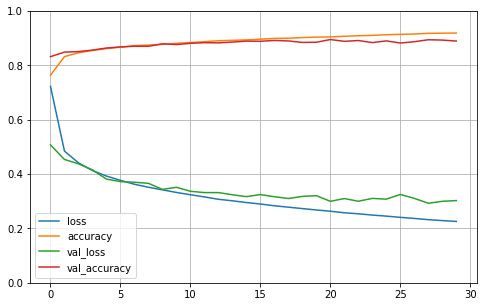

In [47]:
import pandas as pd

pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid()
plt.gca().set_ylim(0, 1)
plt.show()

In [48]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 4s 366us/sample - loss: 0.3364 - accuracy: 0.8780 - loss: 0.3387 - accuracy


[0.33636010887622836, 0.878]

In [49]:
X_new = X_test[:3]

In [50]:
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [51]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1], dtype=int64)

In [52]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

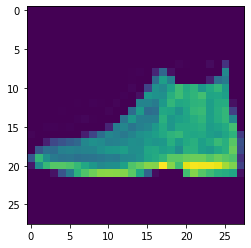

In [53]:
plt.imshow(X_test[0])

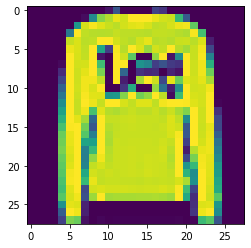

In [54]:
plt.imshow(X_test[1])

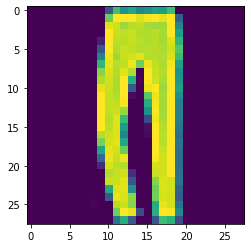

In [55]:
plt.imshow(X_test[2])

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras

In [3]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [4]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [6]:
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [8]:
np.random.seed(42)
tf.random.set_seed(42)

In [9]:
X_train.shape

(11610, 8)

In [10]:
X_valid.shape

(3870, 8)

In [16]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=[8]),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(1)
])

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 30)                270       
_________________________________________________________________
dense_4 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 31        
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(loss='mean_squared_error',
             optimizer=keras.optimizers.SGD(lr=1e-3),
             metrics=['mae'])

In [25]:
model_history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 87us/sample - loss: 0.3974 - mae: 0.4528 - val_loss: 0.4219 - val_mae: 0.4473
Epoch 2/20
11610/11610 [==============================] - 1s 89us/sample - loss: 0.3950 - mae: 0.4519 - val_loss: 0.4141 - val_mae: 0.4427
Epoch 3/20
11610/11610 [==============================] - 1s 88us/sample - loss: 0.3924 - mae: 0.4498 - val_loss: 0.4232 - val_mae: 0.4417
Epoch 4/20
11610/11610 [==============================] - 1s 88us/sample - loss: 0.3908 - mae: 0.4481 - val_loss: 0.4141 - val_mae: 0.4439
Epoch 5/20
11610/11610 [==============================] - 1s 97us/sample - loss: 0.3884 - mae: 0.4476 - val_loss: 0.4061 - val_mae: 0.4368
Epoch 6/20
11610/11610 [==============================] - 1s 120us/sample - loss: 0.3865 - mae: 0.4455 - val_loss: 0.4321 - val_mae: 0.4403
Epoch 7/20
11610/11610 [==============================] - 1s 121us/sample - loss: 0.3850 - mae: 0.4441 - val_loss: 0

In [26]:
mae_test = model.evaluate(X_test, y_test)

5160/5160 [==============================] - 0s 50us/sample - loss: 0.3667 - mae: 0.4328


In [27]:
model_history.history

{'loss': [0.3974064426109978,
  0.39500565524762504,
  0.39239095923307127,
  0.3907979360127839,
  0.38843600744835577,
  0.3865400191630709,
  0.3849518228870954,
  0.38316253247341137,
  0.3815131755865,
  0.3801078484964001,
  0.378847429559315,
  0.3773328894895279,
  0.37592558648235114,
  0.37476261256585136,
  0.37380927792147867,
  0.3727913183451315,
  0.3719035281126711,
  0.37037671299251784,
  0.3696343807697707,
  0.36874659842298935],
 'mae': [0.45278123,
  0.4518946,
  0.44984287,
  0.44809258,
  0.44760588,
  0.445501,
  0.44409373,
  0.44340485,
  0.44192293,
  0.44069508,
  0.44006622,
  0.43905106,
  0.43761846,
  0.43707138,
  0.43667775,
  0.4363243,
  0.43517533,
  0.4340353,
  0.4333187,
  0.4329141],
 'val_loss': [0.4218549242700409,
  0.4140960554589905,
  0.42323283779528714,
  0.4141103870184847,
  0.40605047622392343,
  0.43206980264618106,
  0.393743214519449,
  0.3813995267300643,
  0.3961217564359808,
  0.3892330814393608,
  0.3746977378616653,
  0.37092

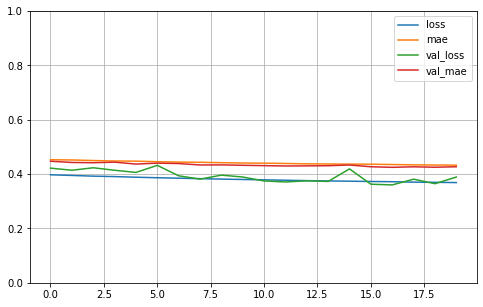

In [28]:
import pandas as pd
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [29]:
X_new = X_test[:3]

In [30]:
y_pred = model.predict(X_new)
y_pred

array([[0.80639446],
       [1.8005309 ],
       [3.7392867 ]], dtype=float32)

In [31]:
y_test[:3]

array([0.477  , 0.458  , 5.00001])

In [32]:
del model

In [33]:
keras.backend.clear_session()

In [39]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(input_)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model([input_], outputs=[output])

In [40]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_15 (Dense)                (None, 30)           270         input_6[0][0]                    
__________________________________________________________________________________________________
dense_16 (Dense)                (None, 30)           930         dense_15[0][0]                   
__________________________________________________________________________________________________
concatenate_5 (Concatenate)     (None, 38)           0           input_6[0][0]                    
                                                                 dense_16[0][0]               

In [41]:
model.compile(loss='mean_squared_error',
             optimizer=keras.optimizers.SGD(lr=1e-3),
             metrics=['mae'])

In [46]:
model_history = model.fit(X_train, y_train, epochs=40, validation_data=(X_valid, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/40
11610/11610 [==============================] - 1s 71us/sample - loss: 0.3785 - mae: 0.4424 - val_loss: 0.4009 - val_mae: 0.4402
Epoch 2/40
11610/11610 [==============================] - 1s 73us/sample - loss: 0.3776 - mae: 0.4422 - val_loss: 0.3939 - val_mae: 0.4371
Epoch 3/40
11610/11610 [==============================] - 1s 73us/sample - loss: 0.3762 - mae: 0.4412 - val_loss: 0.4053 - val_mae: 0.4365
Epoch 4/40
11610/11610 [==============================] - 1s 72us/sample - loss: 0.3754 - mae: 0.4401 - val_loss: 0.3815 - val_mae: 0.4374
Epoch 5/40
11610/11610 [==============================] - 1s 73us/sample - loss: 0.3739 - mae: 0.4400 - val_loss: 0.4074 - val_mae: 0.4346
Epoch 6/40
11610/11610 [==============================] - 1s 105us/sample - loss: 0.3730 - mae: 0.4389 - val_loss: 0.4107 - val_mae: 0.4365
Epoch 7/40
11610/11610 [==============================] - 1s 77us/sample - loss: 0.3721 - mae: 0.4381 - val_loss: 0.

In [47]:
mae_test = model.evaluate(X_test, y_test)

5160/5160 [==============================] - 0s 40us/sample - loss: 0.3521 - mae: 0.4220


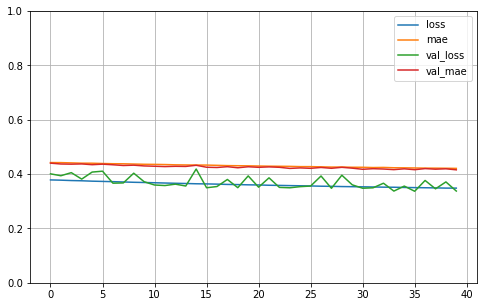

In [48]:
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [49]:
model.save("function_model.h5")

In [64]:
keras.backend.clear_session()

In [65]:
del model

In [52]:
model = keras.models.load_model("function_model.h5")

In [53]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_15 (Dense)                (None, 30)           270         input_6[0][0]                    
__________________________________________________________________________________________________
dense_16 (Dense)                (None, 30)           930         dense_15[0][0]                   
__________________________________________________________________________________________________
concatenate_5 (Concatenate)     (None, 38)           0           input_6[0][0]                    
                                                                 dense_16[0][0]               

In [54]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [66]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=[8]),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(1)
])

In [67]:
model.compile(loss='mse', optimizer=keras.optimizers.SGD(lr=1e-3))

In [70]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("best_model.h5", save_best_only=True)

In [71]:
history = model.fit(X_train, y_train, epochs=5,
                   validation_data = (X_valid, y_valid),
                   callbacks=[checkpoint_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/5
11610/11610 [==============================] - 1s 70us/sample - loss: 0.5199 - val_loss: 0.4754
Epoch 2/5
11610/11610 [==============================] - 1s 74us/sample - loss: 0.4937 - val_loss: 0.4508
Epoch 3/5
11610/11610 [==============================] - 1s 83us/sample - loss: 0.4725 - val_loss: 0.4390
Epoch 4/5
11610/11610 [==============================] - 1s 77us/sample - loss: 0.4557 - val_loss: 0.4333
Epoch 5/5
11610/11610 [==============================] - 1s 80us/sample - loss: 0.4427 - val_loss: 0.4240


In [61]:
keras.backend.clear_session()

In [62]:
model = keras.models.load_model("Model-05.h5")

In [63]:
mae_test = model.evaluate(X_test, y_test)

5160/5160 [==============================] - 0s 68us/sample - loss: 0.5049
